In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')
# 여기까지하고 런타임 다시 시작!!——> 이 셀부터 설치빼고 다시 실행

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


Text(0.5, 1.0, '안녕@')

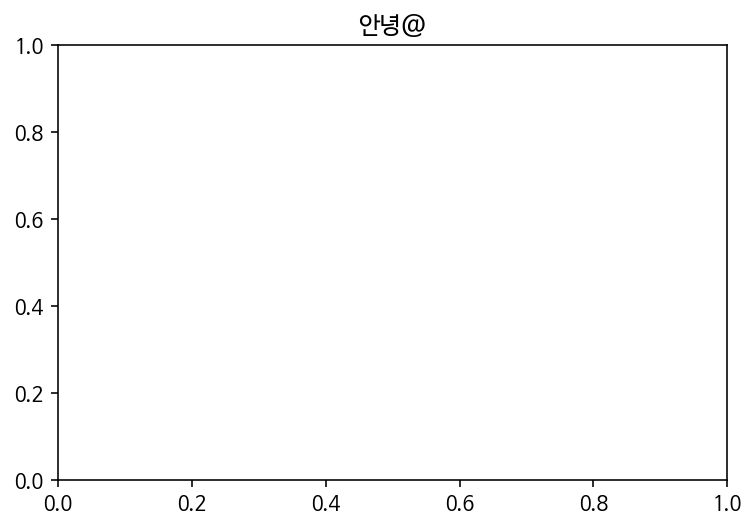

In [ ]:
import matplotlib.font_manager as fm 
plt.title("안녕@")

In [ ]:
bit=pd.read_csv("/content/block3.csv", names = ['day', 'price'])
bit

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [ ]:
bit['day']=pd.to_datetime(bit['day'])


In [ ]:
bit.set_index('day', inplace=True)

In [ ]:
# 시계열 데이터는 시간적인 순서가 중요. 미래에대한 수치를 예측하는것
#최근 5일치를 검증용 데이터로 사용하게됨. 5일치를뺀 나머지는 훈련데이터

In [ ]:
bit_train_df=bit.iloc[:361]
bit_train_df[:360]
bit_train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2020-12-09 to 2021-12-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   361 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [ ]:
bit_train_df

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


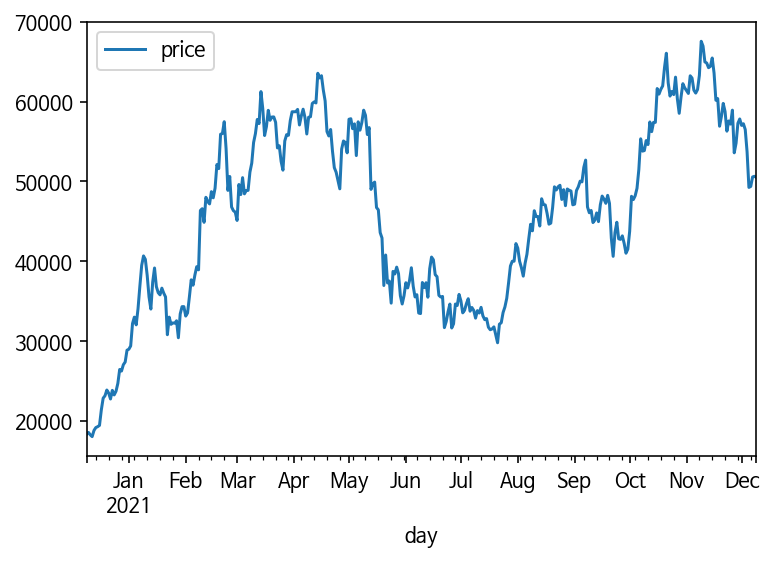

In [ ]:
bit.plot()

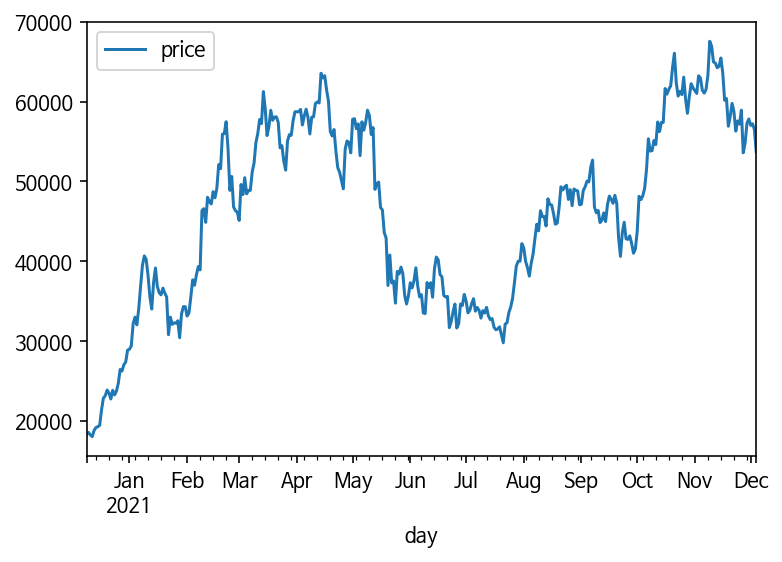

In [ ]:
bit_train_df.plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#아리마 모델: 시계열의 유명한 모델.    AR+I+MA
#AR:값들의 흐름의 특징을 가지고 예측하는  모델
#MA : 값들의 차이 (어제보다 얼마나오르고 떨어졌는지)를 가지고 예측하는 모델
# I : AR + MA  . . . . . . 트렌드분석도 가능하게 해줌

In [ ]:
model = ARIMA(bit_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.895
Method:                       css-mle   S.D. of innovations           1882.640
Date:                Wed, 20 Apr 2022   AIC                           6463.790
Time:                        01:47:34   BIC                           6487.107
Sample:                             1   HQIC                          6473.062
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.4034     99.476      0.989      0.323     -96.566     293.373
ar.L1.D.y      0.9185      0.040     23.086      0.000       0.840       0.996
ar.L2.D.y     -0.9440      0.032    -29.398      0.0

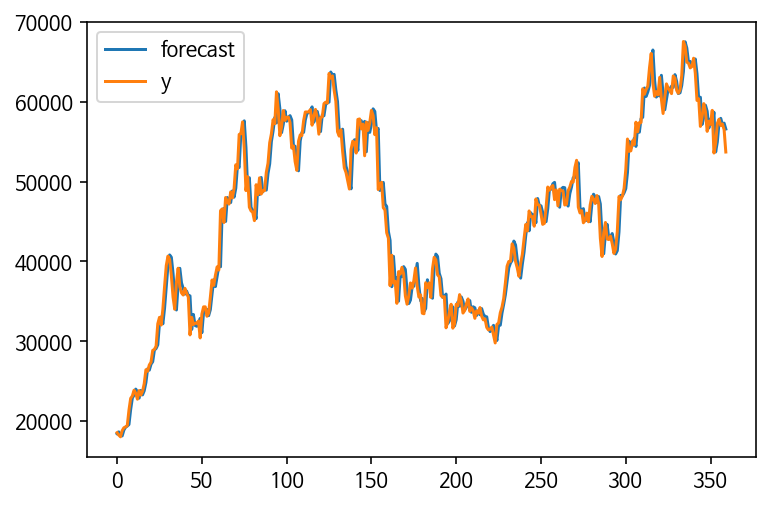

In [ ]:
fig= model_fit.plot_predict()

## forecast ...공부한값

In [ ]:
forecast_data = model_fit.forecast(steps=5) 

bitcoin_test_df = bit[361:]
bitcoin_test_df

,price
day,
2021-12-05,49253.86
2021-12-06,49380.43
2021-12-07,50564.63
2021-12-08,50645.41
2021-12-09,50511.12


In [ ]:
from pandas.core.common import is_full_slice
pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.price.values
result=[]
pred_y,test_y

array([4624.65041868, 4547.58418335, 3354.32039997, 3319.40109877,
       3605.28429724])

In [ ]:
for i in range (5):
  if pred_y[i]>test_y[i]:
    print("예측값이 더 높음",pred_y[i]-test_y[i])
  if pred_y[i]<test_y[i]:
    print("예측값이 더 낮음",pred_y[i]-test_y[i])


예측값이 더 높음 4624.650418679354
예측값이 더 높음 4547.584183351304
예측값이 더 높음 3354.320399966782
예측값이 더 높음 3319.4010987702204
예측값이 더 높음 3605.2842972409635


In [ ]:
from sklearn.metrics import *

In [ ]:
mean_squared_error(test_y,pred_y)

15467175.45274812

In [ ]:
r2_score(test_y,pred_y)

-39.44916401714005

5년치 가지고 해보세요!

In [ ]:
bit2=pd.read_csv("/content/market-price.csv")
bit2
bit2.set_index("Timestamp", inplace=True)

In [ ]:
bit2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 2019-04-21 00:00:00 to 2022-04-19 00:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market-price  1095 non-null   float64
dtypes: float64(1)
memory usage: 17.1+ KB


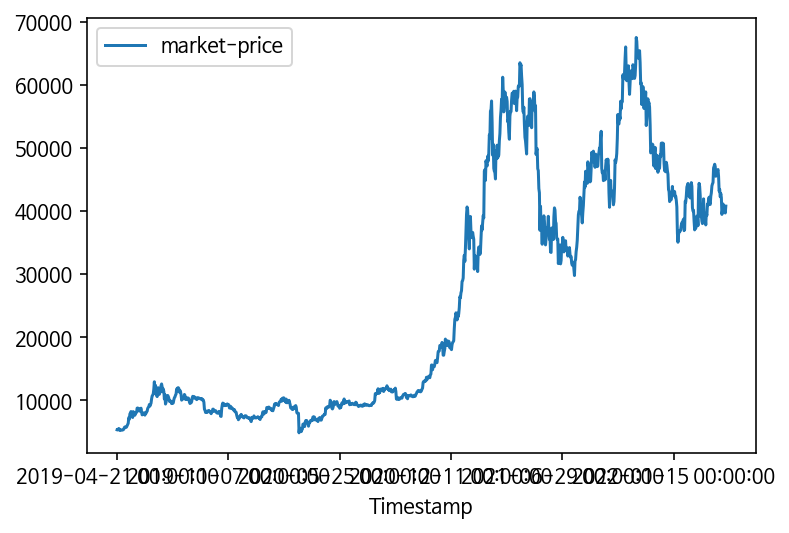

In [ ]:
bit2.plot()

In [ ]:
bit2_train=bit2[:1091]
bit2_train

,market-price
Timestamp,
2019-04-21 00:00:00,5309.28
2019-04-22 00:00:00,5281.83
2019-04-23 00:00:00,5377.19
2019-04-24 00:00:00,5518.16
2019-04-25 00:00:00,5434.19
...,...
2022-04-11 00:00:00,42144.23
2022-04-12 00:00:00,39488.62
2022-04-13 00:00:00,40102.20


In [ ]:
model = ARIMA(bit2_train['market-price'].values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1090
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9302.360
Method:                       css-mle   S.D. of innovations           1230.464
Date:                Wed, 20 Apr 2022   AIC                          18616.720
Time:                        02:07:14   BIC                          18646.684
Sample:                             1   HQIC                         18628.061
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7373     36.694      0.865      0.387     -40.181     103.656
ar.L1.D.y      0.8310      0.040     20.605      0.000       0.752       0.910
ar.L2.D.y     -0.9602      0.043    -22.557      0.0

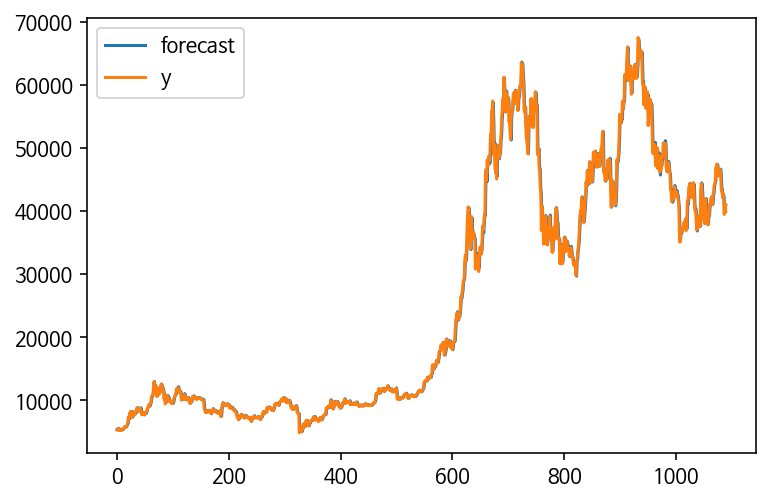

In [ ]:
fig = model_fit.plot_predict()

In [ ]:
forecast_data = model_fit.forecast(steps=5) 

bit2_test = bit2[1090:]
bit2_test

,market-price
Timestamp,
2022-04-15 00:00:00,39939.90
2022-04-16 00:00:00,40566.20
2022-04-17 00:00:00,40388.78
2022-04-18 00:00:00,39711.45
2022-04-19 00:00:00,40805.72


In [ ]:
pred_y = forecast_data[0].tolist()
pred_y [:4]

[39729.130855938005, 39756.1673432454, 40016.85746201223, 40243.360673862626]

In [ ]:
test_y = bit2_test['market-price'].values
test_y

array([39939.9 , 40566.2 , 40388.78, 39711.45, 40805.72])

In [ ]:
mean_squared_error(test_y,pred_y)

293661.70422509

In [ ]:
r2_score(test_y,pred_y)

-0.8149378384659229

In [100]:
for i in range (5):
  if pred_y[i]>test_y[i]:
    print("예측값이 더 높음",pred_y[i]-test_y[i])
  if pred_y[i]<test_y[i]:
    print("예측값이 더 낮음",pred_y[i]-test_y[i])


예측값이 더 낮음 -210.76914406199649
예측값이 더 낮음 -810.0326567545999
예측값이 더 낮음 -371.922537987768
예측값이 더 높음 531.9106738626288
예측값이 더 낮음 -588.6226675856524


In [101]:
from fbprophet import Prophet

In [106]:
bit3=pd.read_csv("/content/market-price.csv",names = ['ds', 'y'])
bit3.drop(0,axis=0, inplace=True)

In [107]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(bit3)

In [108]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1095,2022-04-20,40415.912845,38229.998809,42678.284984
1096,2022-04-21,40041.204895,37797.724837,42227.217694
1097,2022-04-22,39421.081324,37143.696064,41582.171432
1098,2022-04-23,38888.912010,36659.924783,40945.928377
1099,2022-04-24,38275.735752,35946.530639,40417.333451


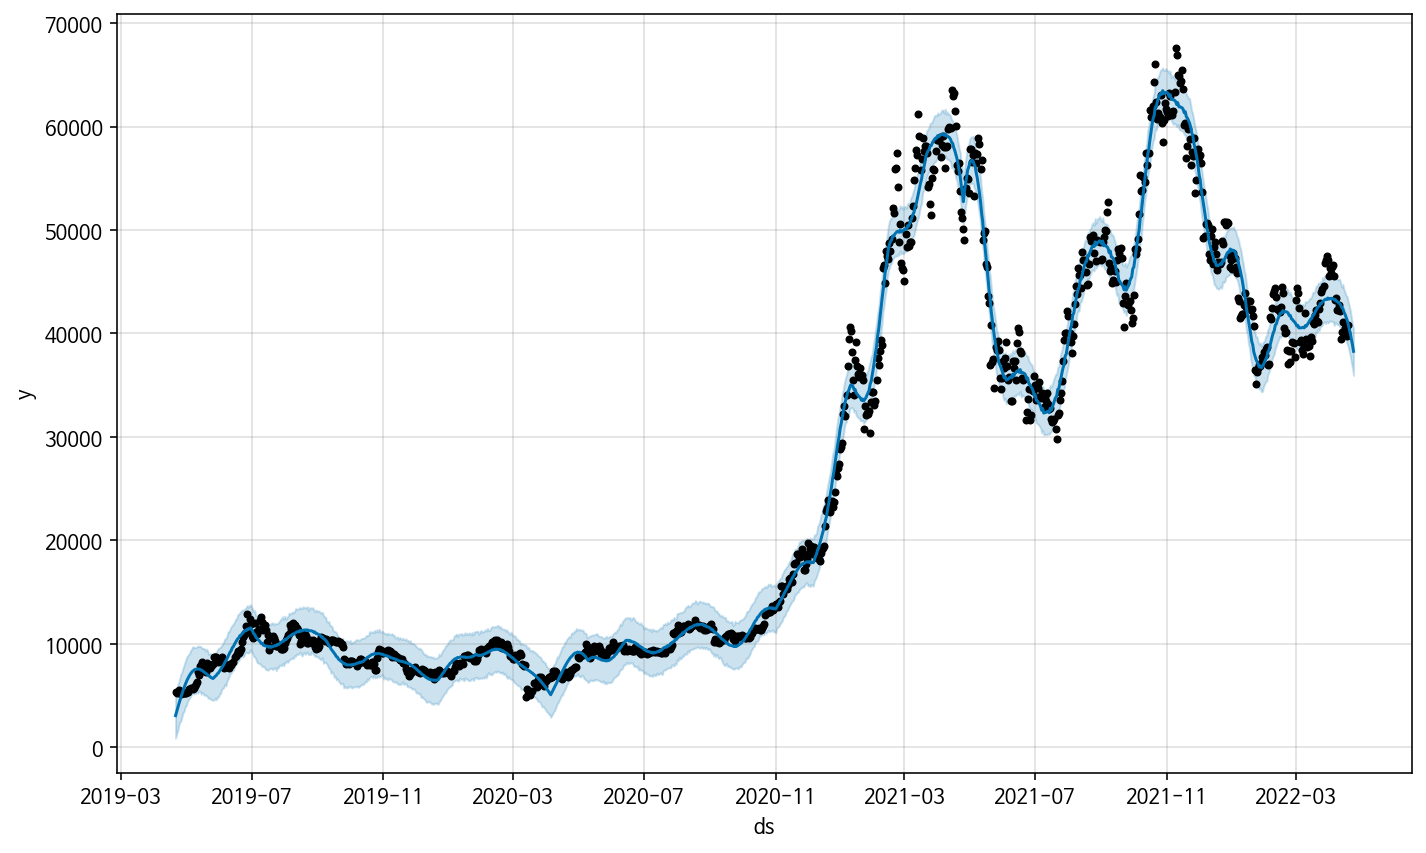

In [109]:
fig1 = prophet.plot(forecast_data)

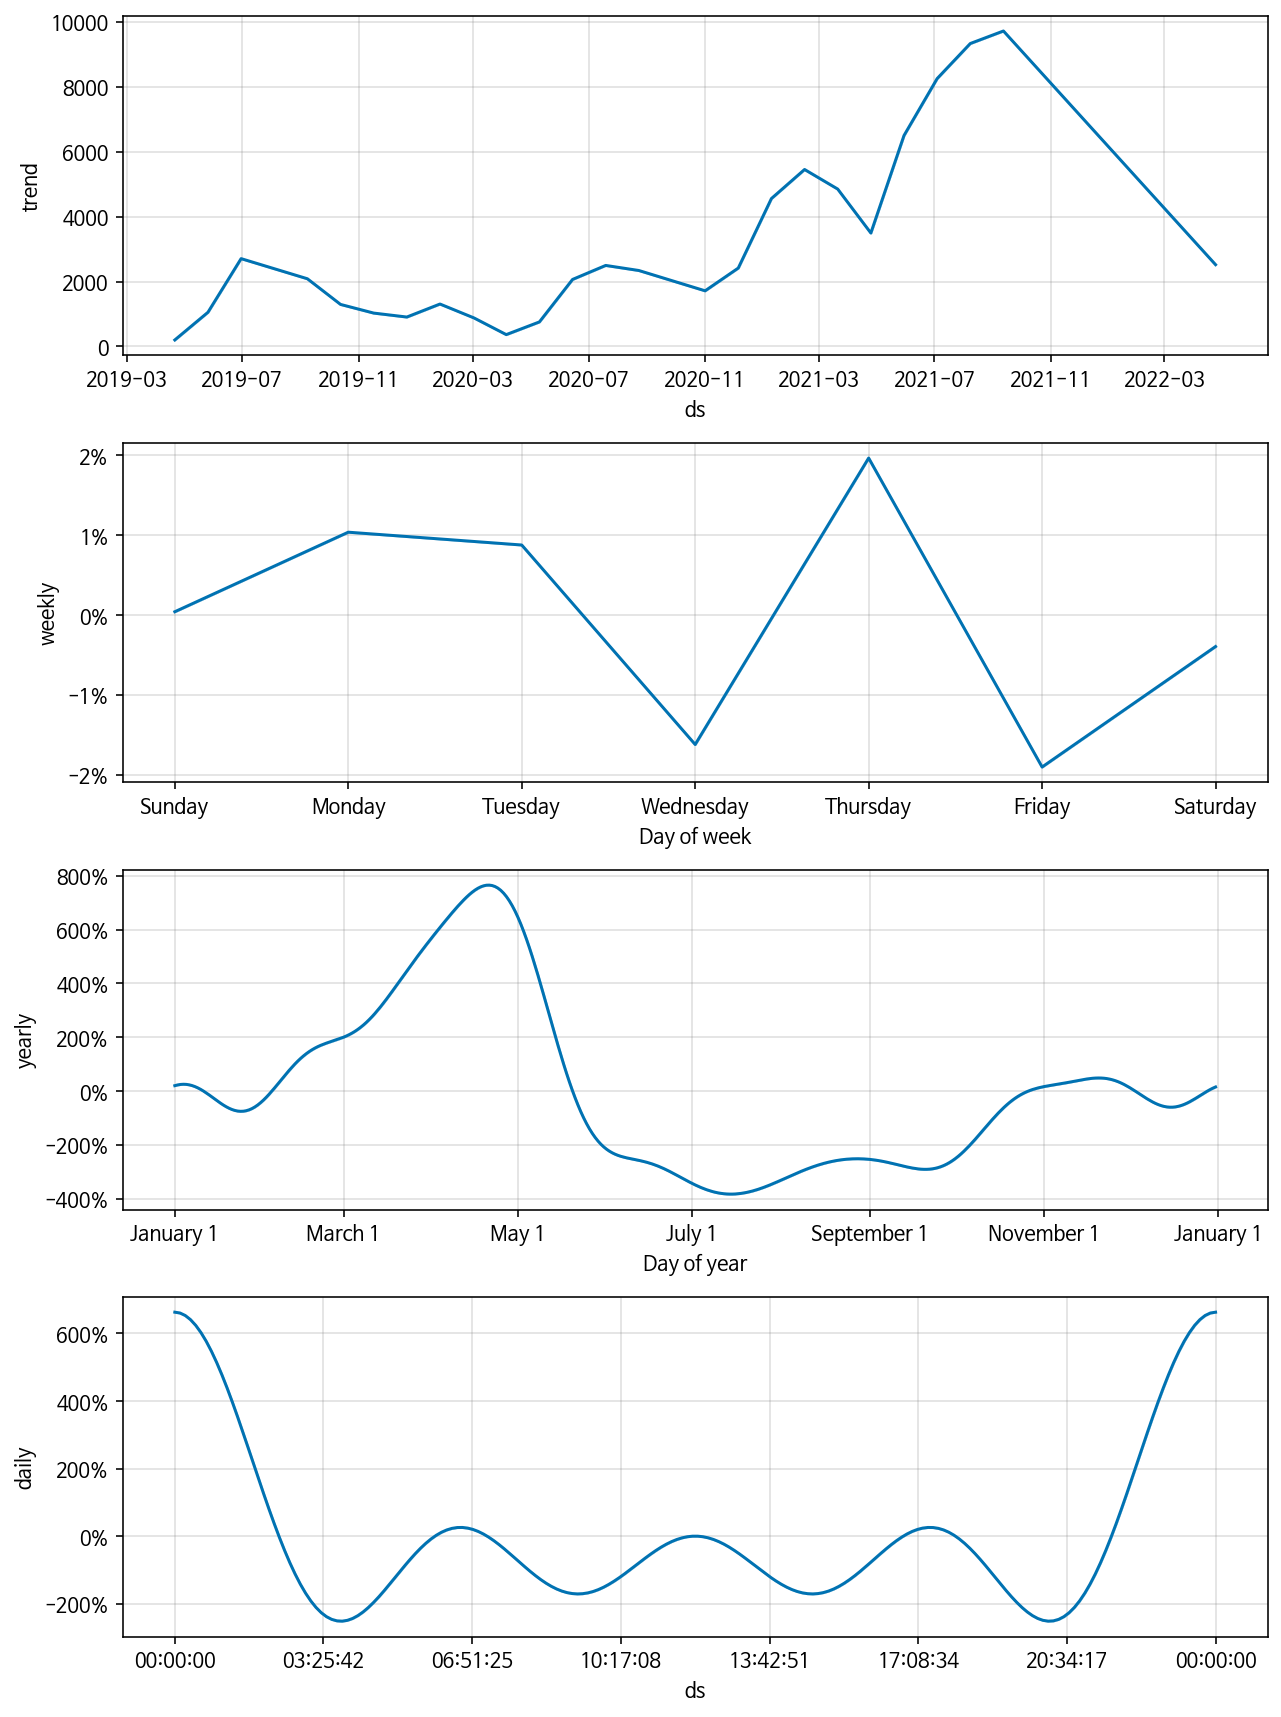

In [110]:
fig2 = prophet.plot_components(forecast_data)

In [111]:
## 오차계산.... 하고싶은데 

In [136]:
bit3_train=bit3.iloc[:1090]
bit3_train

,ds,y
1,2019-04-21 00:00:00,5309.28
2,2019-04-22 00:00:00,5281.83
3,2019-04-23 00:00:00,5377.19
4,2019-04-24 00:00:00,5518.16
5,2019-04-25 00:00:00,5434.19
...,...,...
1086,2022-04-10 00:00:00,42787.69
1087,2022-04-11 00:00:00,42144.23
1088,2022-04-12 00:00:00,39488.62
1089,2022-04-13 00:00:00,40102.2


In [138]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
).fit(bit3_train)

In [139]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)


,ds,yhat,yhat_lower,yhat_upper
1090,2022-04-15,42789.762804,40456.391763,45025.876725
1091,2022-04-16,42810.395466,40502.616070,45093.446449
1092,2022-04-17,42809.645692,40612.883244,45067.486729
1093,2022-04-18,42788.188089,40322.524189,44923.977530
1094,2022-04-19,42832.221855,40686.891030,45156.008733


In [140]:
test=forecast_data[1090:]['yhat'].values

In [141]:
pred=bit3[1090:]['y'].values

In [142]:
mean_squared_error(test,pred)

6518349.805453459

In [143]:
r2_score(test,pred)

-25048.411718967072

In [144]:
df=pd.DataFrame({'day':bit3[1090:]['ds'], 'real_data':bit3[1090:]['y'].values, 'pred_data':forecast_data[1090:]['yhat'].values})

In [145]:
df

,day,real_data,pred_data
1091,2022-04-15 00:00:00,39939.9,42789.762804
1092,2022-04-16 00:00:00,40566.2,42810.395466
1093,2022-04-17 00:00:00,40388.78,42809.645692
1094,2022-04-18 00:00:00,39711.45,42788.188089
1095,2022-04-19 00:00:00,40805.72,42832.221855
